In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
warp_size = 32
n_sm = 82
thread_per_sm = 1536

# blocks per grid x threas per block
# filename = 'Cit-Patents_512x512'
# filename = 'web-BerkStan_669x1024' 
# filename = 'web-BerkStan_128x128' 
# filename = 'web-BerkStan_256x1024'
# filename = 'web-BerkStan_512x512'
# filename = 'web-BerkStan_1024x1024' 
# filename = 'wiki-topcats_128x128'
# filename = 'wiki-topcats_256x1024'
# filename = 'wiki-topcats_512x512'
# filename = 'wiki-topcats_1024x1024'
# filename = 'com-orkut_64x1024'
filename = 'com-orkut_128x1024'
# filename = 'com-orkut_256x1024'
# filename = 'com-friendster_256x1024'
# filename = 'com-friendster_1024x1024'

with open('./log_' +filename, 'r') as f:
    runtime = float(f.readline().strip())

df = pd.read_csv(f'log_{filename}',skiprows=1)
df = df.iloc[::warp_size].reset_index(drop=True)

starts = df['start_time']
ends = df['end_time']
clock_time = df['clock_time']
active_time = df['active_time']
print(runtime)
df

97.38


,thread_id,start_time,end_time,clock_time,active_time
0,0,3523971475015,3524161749754,190274739,181296552
1,1,3523971475015,3524161749754,190274739,181296552
2,2,3523971475015,3524161749754,190274739,181296552
3,3,3523971475015,3524161749754,190274739,181296552
4,4,3523971475015,3524161749754,190274739,181296552
...,...,...,...,...,...
131067,131067,3529205931044,3529206796792,865748,162254
131068,131068,3529205931044,3529206796792,865748,162254
131069,131069,3529205931044,3529206796792,865748,162254
131070,131070,3529205931044,3529206796792,865748,162254


In [3]:
((df['clock_time']-df['active_time'])/df['clock_time']).describe()

count    131072.000000
mean          0.252957
std           0.293801
min           0.001546
25%           0.060845
50%           0.068364
75%           0.471517
max           0.967433
dtype: float64

In [4]:
((df['clock_time']-df['active_time'])/df['clock_time']).sort_values(ascending=False)

105438    0.967433
105422    0.967433
105408    0.967433
105409    0.967433
105410    0.967433
            ...   
97403     0.001546
97404     0.001546
97405     0.001546
97406     0.001546
97407     0.001546
Length: 131072, dtype: float64

In [5]:
df['active_time'].sort_values(ascending=True)

111951        28706
111965        28706
111964        28706
111963        28706
111962        28706
            ...    
41987     181393965
41986     181393965
41985     181393965
41998     181393965
42015     181393965
Name: active_time, Length: 131072, dtype: int64

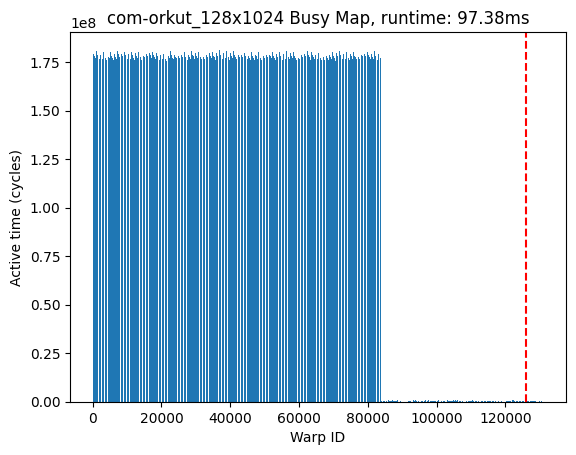

In [6]:
plt.bar(range(len(active_time)), active_time)

plt.title(f"{filename} Busy Map, runtime: {runtime}ms")
plt.xlabel("Warp ID")
plt.ylabel("Active time (cycles)")
plt.axvline(x=n_sm*thread_per_sm/warp_size, color='red', linestyle='--')
plt.show()

In [7]:
# fig, ax = plt.subplots(figsize=(30, 7))
fig, ax = plt.subplots()

# 對於DataFrame中的每一行，繪製一個表示thread活動的條形
for index, (_, row) in enumerate(df.iterrows()):
    ax.broken_barh([(index - 0.4, 0.8)], 
                   (row['start_time'], row['clock_time']), facecolors='blue')

ax.set_ylabel('Cycles')
ax.set_xlabel('Warp ID')
ax.set_title(f'{filename} Warp Life Cycle, runtime: {runtime}ms')

ax.axvline(x=n_sm*thread_per_sm/warp_size, color='red', linestyle='--')

plt.show()

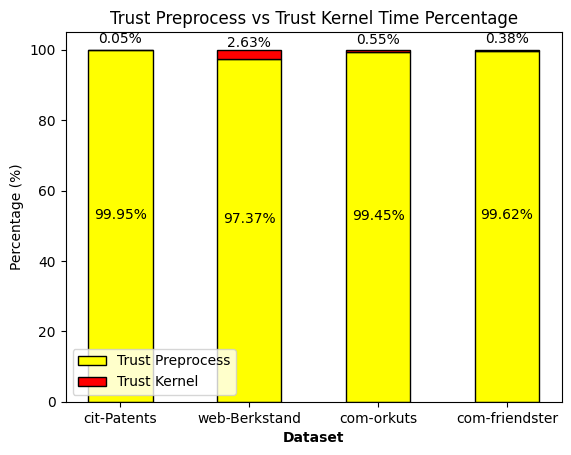

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 数据集名称
datasets = ['cit-Patents', 'web-Berkstand', 'com-orkuts', 'com-friendster']

# Trust Preprocess 时间 (秒)
preprocess_times = np.array([10, 1, 19, 608])  # 根据表格中的数据

# Trust Kernel 时间 (秒)
kernel_times = np.array([5e-3, 27e-3, 105e-3, 2.29])  # 转换为秒

# 总时间
total_times = preprocess_times + kernel_times

# 计算百分比
preprocess_percentage = (preprocess_times / total_times) * 100
kernel_percentage = (kernel_times / total_times) * 100

# 绘制堆叠条形图
bar_width = 0.5
r = np.arange(len(datasets))

bars1 = plt.bar(r, preprocess_percentage, color='yellow', edgecolor='black', width=bar_width, label='Trust Preprocess')
bars2 = plt.bar(r, kernel_percentage, bottom=preprocess_percentage, color='red', edgecolor='black', width=bar_width, label='Trust Kernel')

# 在条形图上添加百分比标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# 添加标签和标题
plt.xlabel('Dataset', fontweight='bold')
plt.xticks(r, datasets)
plt.ylabel('Percentage (%)')
plt.title('Trust Preprocess vs Trust Kernel Time Percentage')

# 创建图例
plt.legend()

# 显示图表
plt.show()
